# Problem Scoping

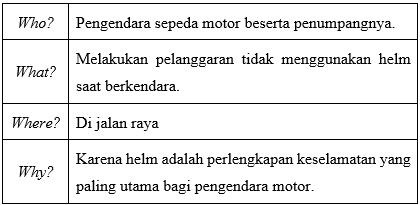

# Install YOLOV5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

# Install Dependecies

In [ ]:
import torch
from yolov5 import utils
display = utils.notebook_init()

In [ ]:
%cd ..

# Sambungkan ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Acquisition

In [ ]:
import shutil
import os, sys

zip_file = "drive/MyDrive/easy-helmet-detection.zip" #input your training model file

if os.path.isfile(zip_file):
  shutil.unpack_archive(zip_file, "data")
else:
  print(zip_file + " not found")

# Splitting Dataset

In [ ]:
import os, shutil, random

# preparing the folder structure

full_data_path = 'data/easy-helmet-detection/'
extension_allowed = '.jpg'
split_percentage = 90

images_path = 'data/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)

labels_path = 'data/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path)

print("copying validation data")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)

print("finished")

# Tampilkan Isi File Dataset

In [ ]:
#Jalur direktori data training easy detection helmet
training_easy_detection_helmet_dir = os.path.join('/content/data/images/training')

#Jalur direktori data validation easy detection helmet
validation_easy_detection_helmet_dir = os.path.join('/content/data/images/validation')

In [ ]:
#Menampilkan nama file data training
training_easy_detection_helmet_names_file = os.listdir(training_easy_detection_helmet_dir)
print(training_easy_detection_helmet_names_file[:10])

In [ ]:
#Menampilkan nama file data validation
validation_easy_detection_helmet_names_files = os.listdir(validation_easy_detection_helmet_dir)
print(validation_easy_detection_helmet_names_files[:10])

# Total Data Training dan Validation

In [ ]:
print('total data training easy detection helmet:', len(os.listdir(training_easy_detection_helmet_dir)))
print('total data validation easy detection helmet:', len(os.listdir(validation_easy_detection_helmet_dir)))

# Data Exploration

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_training_pic = [os.path.join(training_easy_detection_helmet_dir, fname)
                for fname in training_easy_detection_helmet_names_file[pic_index-8:pic_index]]
next_validation_pic = [os.path.join(validation_easy_detection_helmet_dir, fname)
                for fname in validation_easy_detection_helmet_names_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_training_pic + next_validation_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Buat File datset.yaml

In [ ]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['menggunakan helm', 'tidak menggunakan helm']\n")
f.close()

# Training Data

In [ ]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 190 --data ../dataset.yaml --weights yolov5n.pt

# Evaluate Model Performance

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

# Data Test Menggunakan Gambar

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest1.jpg

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp/Datatest1.jpg"
display(Image.open(image_path))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest2.jpg

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp2/Datatest2.jpg"
display(Image.open(image_path))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest3.jpg

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp3/Datatest3.jpg"
display(Image.open(image_path))

# Data Test Menggunakan Video

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source 'https://www.youtube.com/watch?v=ogLbruAGaj8'

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest5.mp4

In [ ]:
!python detect.py --weights best.pt --source 0  # webcam